In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from wolta.data_tools import col_types
from wolta.data_tools import seek_null
from wolta.data_tools import unique_amounts
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics

## Variables Description
# Age:
# Data Range: 20 to 50 years. Data Type: Integer.

# Gender:
# Categories: Male (0) or Female (1). Data Type: Binary.

# Education Level:
# Categories: 1: Bachelor's (Type 1), 2: Bachelor's (Type 2), 3: Master's, 4: PhD. Data Type: Categorical.

# Experience Years:
# Data Range: 0 to 15 years. Data Type: Integer.

# Previous Companies Worked:
# Data Range: 1 to 5 companies. Data Type: Integer.

# Distance From Company:
# Data Range: 1 to 50 kilometers. Data Type: Float (continuous).

# Interview Score:
# Data Range: 0 to 100. Data Type: Integer.

#Skill Score: 
# Data Range: 0 to 100. Data Type: Integer.

# Personality Score:
# Data Range: 0 to 100. Data Type: Integer.

# Recruitment Strategy: 
# Categories: 1: Aggressive, 2: Moderate, 3: Conservative. Data Type: Categorical.

# Hiring Decision (Target Variable):
# Categories: 0: Not hired, 1: Hired. Data Type: Binary (Integer).

df = pd.read_csv('recruitment_data.csv')

df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [2]:
types = col_types(df, print_columns=True)

Age: int64
Gender: int64
EducationLevel: int64
ExperienceYears: int64
PreviousCompanies: int64
DistanceFromCompany: float64
InterviewScore: int64
SkillScore: int64
PersonalityScore: int64
RecruitmentStrategy: int64
HiringDecision: int64


In [3]:
nulls = seek_null(df, print_columns=True)

In [4]:
unique_amounts(df)

{'Age': 31,
 'Gender': 2,
 'EducationLevel': 4,
 'ExperienceYears': 16,
 'PreviousCompanies': 5,
 'DistanceFromCompany': 1500,
 'InterviewScore': 101,
 'SkillScore': 101,
 'PersonalityScore': 101,
 'RecruitmentStrategy': 3,
 'HiringDecision': 2}

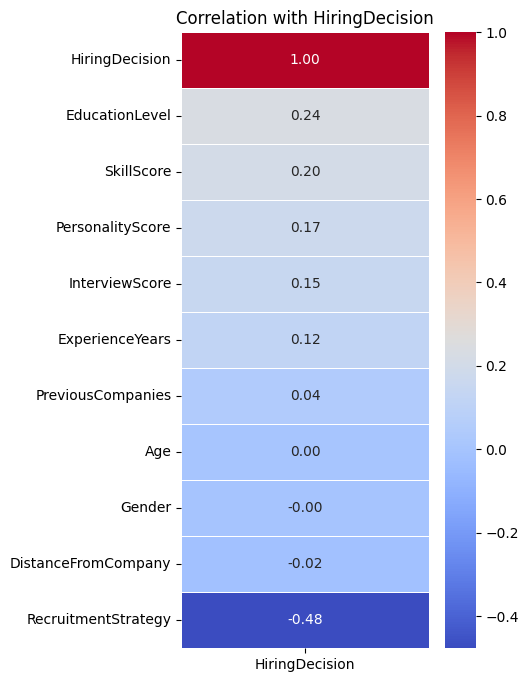

In [5]:
# Heatmap of the correlation (to the Target Column)
corr = df.corr()
target_column = 'HiringDecision'

column_corr = corr[[target_column]].sort_values(by=target_column, ascending=False)

plt.figure(figsize=(4, 8))
sns.heatmap(column_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title(f'Correlation with {target_column}')
plt.show()

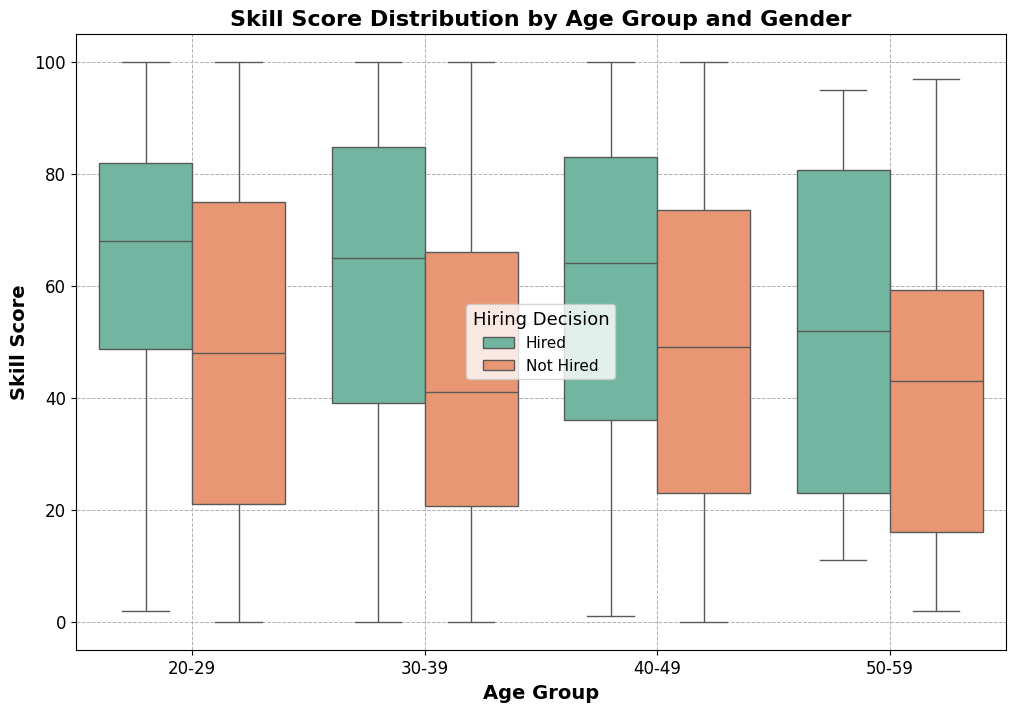

In [6]:
### Creating a df for visualization purposes
viz_df = df.copy()
bins = [20, 29, 39, 49, 59]
labels = ['20-29', '30-39', '40-49', '50-59']
viz_df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
viz_df['Gender']=df['Gender'].map({0:'Male',1:'Female'})
viz_df['HiringDecision']=df['HiringDecision'].map({0:'Not Hired',1:'Hired'})

bins = [0, 3, 8, float('inf')]
labels = ['Early Entry 0-3 YoE', 'Mid-Level 4-8 YoE', 'Senior 9+ YoE']
viz_df['ExperienceLevel'] = pd.cut(df['ExperienceYears'], bins=bins, labels=labels, right=False)


### Chart to observe the variation of skill scores trhought the ages and if they were hired or not.
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(data=viz_df, x='AgeGroup', y='SkillScore', hue='HiringDecision', palette='Set2')

boxplot.set_title('Skill Score Distribution by Age Group and Gender', fontsize=16, fontweight='bold')
boxplot.set_xlabel('Age Group', fontsize=14, fontweight='bold')
boxplot.set_ylabel('Skill Score', fontsize=14, fontweight='bold')
boxplot.legend(title='Hiring Decision', title_fontsize='13', fontsize='11')
boxplot.grid(True, linestyle='--', linewidth=0.7)

boxplot.tick_params(axis='x', labelsize=12)
boxplot.tick_params(axis='y', labelsize=12)
plt.show()

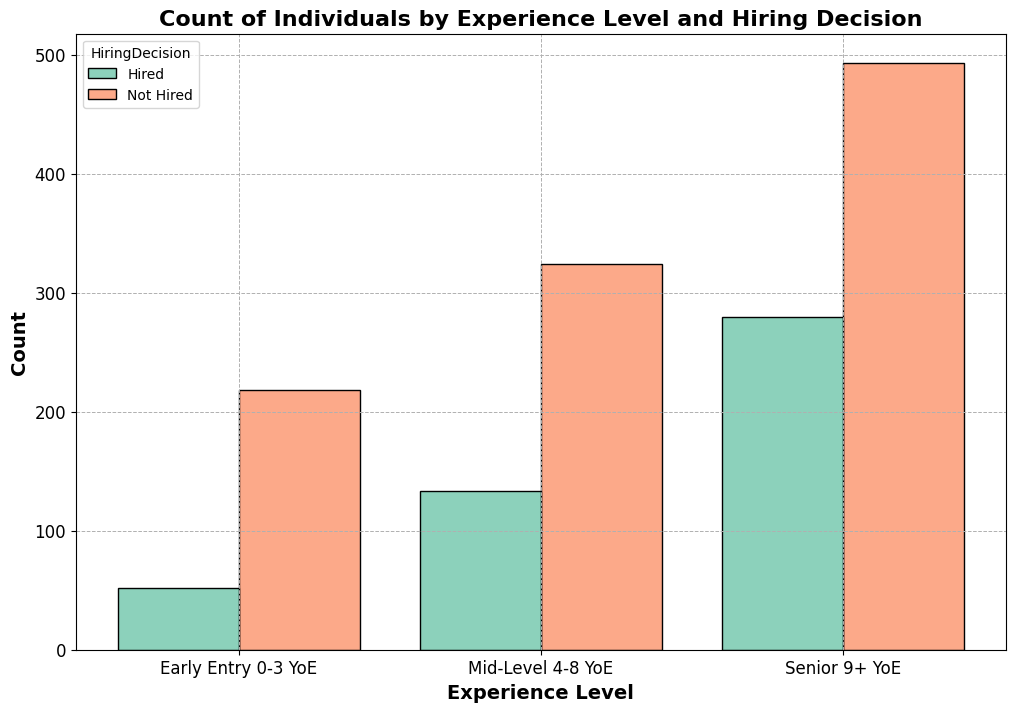

In [7]:
## Chart to observe candidates and their profiles related to years of experience.
plt.figure(figsize=(12, 8))
histogram = sns.histplot(data=viz_df, x='ExperienceLevel', hue='HiringDecision', multiple='dodge', shrink=0.8, palette='Set2', edgecolor='black')

histogram.set_title('Count of Individuals by Experience Level and Hiring Decision', fontsize=16, fontweight='bold')
histogram.set_xlabel('Experience Level', fontsize=14, fontweight='bold')
histogram.set_ylabel('Count', fontsize=14, fontweight='bold')

histogram.grid(True, linestyle='--', linewidth=0.7)

histogram.tick_params(axis='x', labelsize=12)
histogram.tick_params(axis='y', labelsize=12)
plt.show()

In [8]:
##Logistic Regression
X = df.drop(['HiringDecision'], axis=1)
y = df['HiringDecision']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
log_reg = LogisticRegression(solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [9]:
predictions = best_estimator.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[206  13]
 [ 25  56]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       219
           1       0.81      0.69      0.75        81

    accuracy                           0.87       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.87      0.87      0.87       300



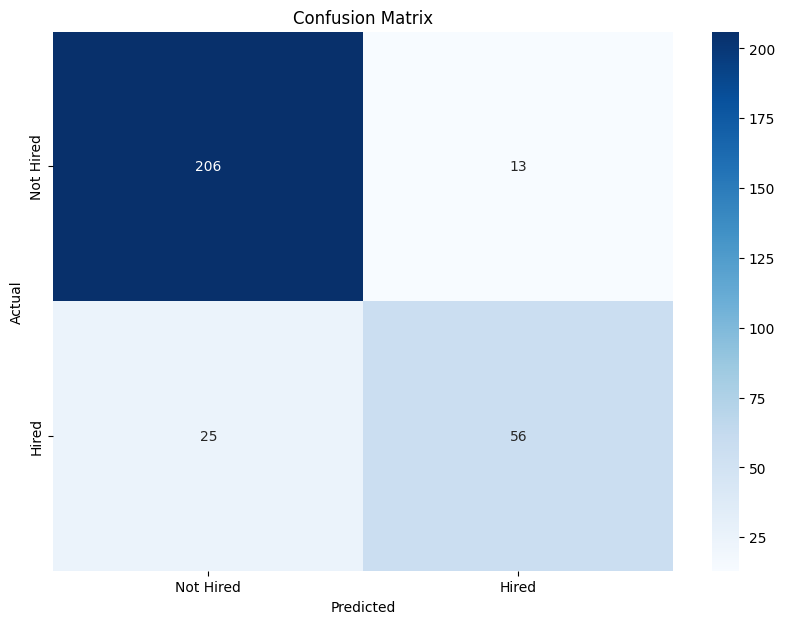

In [10]:
# Matrix to compare results vs prediction
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.metrics import precision_score, recall_score

# Metrics
precision = precision_score(y_test, predictions)

print("Precision:", precision)

Precision: 0.8115942028985508


In [12]:
##Predicting with my features
km = df['DistanceFromCompany'].mean()
ints = df['InterviewScore'].mean()

columns = ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 
           'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'RecruitmentStrategy']

# Values for the new row
me_values = np.array([[24, 0, 1, 2, 1, km, ints, 65, 65, 2]])

# Create a DataFrame
df_me = pd.DataFrame(data=me_values, columns=columns)
#df_me['Candidate'] = 'Me'


my_prediction = best_estimator.predict(df_me)

if my_prediction[0] == 1:
    print('You´re Hired')
else:
    print('Maybe next time :p')

Maybe next time :p


In [13]:
#Create a df to see the mean of the hired candidtates to compare the profile against me
hired = df.query('HiringDecision == 1')
hired = hired.drop(columns='HiringDecision')

mean_of_hired = hired.mean()
mean_array = mean_of_hired.to_numpy()
mean_df = pd.DataFrame(data=mean_of_hired.to_numpy().reshape(1, -1), columns=columns)

concat = [df_me,mean_df]
df = pd.concat(concat)
df['Candidate'] = ''
df = df.reset_index(drop=True)

df.at[0,'Candidate'] = 'Me'
df.at[1,'Candidate'] = 'Mean Profile'
df = df.round(2)

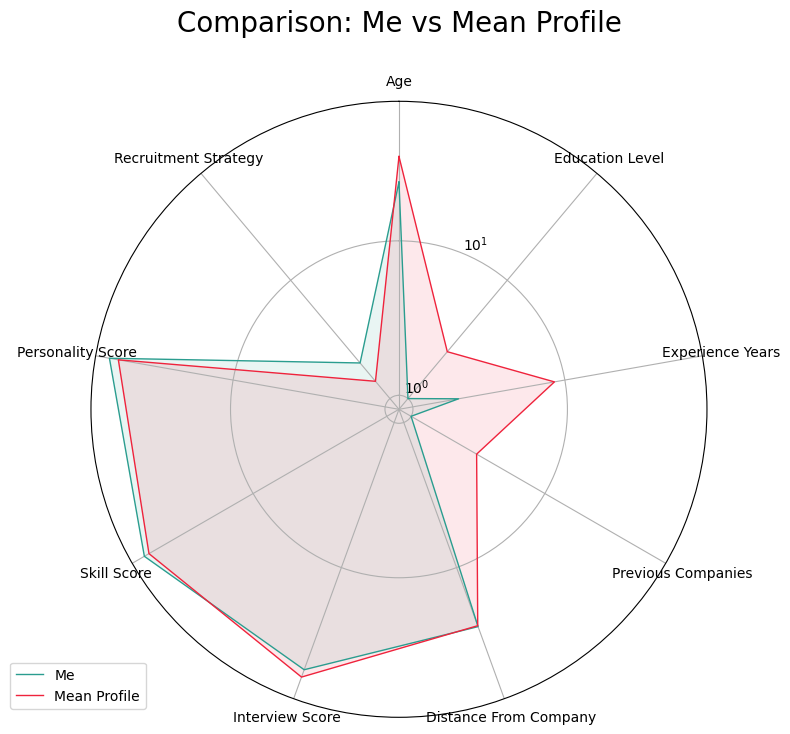

In [14]:
# Data
labels = ['Age', 'Education Level', 'Experience Years', 'Previous Companies',
          'Distance From Company', 'Interview Score', 'Skill Score', 'Personality Score', 'Recruitment Strategy']
me = [24.00, 1.00, 2.00, 1.00, 25.51, 50.56, 65.00, 65.00, 2.00]
mean_profile = [35.17, 2.49, 8.54, 3.09, 25.14, 56.80, 60.03, 56.79, 1.40]

# Number of variables we're plotting
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
me += me[:1]
mean_profile += mean_profile[:1]
angles += angles[:1]

# Size of the figure
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw y-labels
ax.set_rscale('log')
plt.xticks(angles[:-1], labels)

# Plot data with specified colors
ax.plot(angles, me, linewidth=1, linestyle='solid', label='Me', color='#2a9d8f')  # Color for 'Me'
ax.fill(angles, me, '#2a9d8f', alpha=0.1)

ax.plot(angles, mean_profile, linewidth=1, linestyle='solid', label='Mean Profile', color='#ef233c')  # Color for 'Mean Profile'
ax.fill(angles, mean_profile, '#ef233c', alpha=0.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Title
plt.title('Comparison: Me vs Mean Profile', size=20, y=1.1)

plt.show()